In [256]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [244]:
# import data/create city data df
city_data = os.path.join("city_data.csv")
city_data_df = pd.read_csv(city_data, encoding = "ISO-8859-1")
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [245]:
# import data/create ride data df
ride_data = os.path.join("ride_data.csv")
ride_data_df = pd.read_csv(ride_data, encoding = "ISO-8859-1")
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [246]:
# total number of fares
tot_fare_city = ride_data_df.groupby("city")
tot_city_fare = tot_fare_city["fare"].sum()
tot_city_fare

# convert series to dataframe
total_city_fare_df = tot_city_fare.to_frame()
total_fare = total_city_fare_df.reset_index()
total_fare = total_fare.rename(columns={"fare":"Total Amount of Fares"})
total_fare.head()


,city,Total Amount of Fares
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [247]:
# avg fare by city
fare_city = ride_data_df.groupby("city")
ride_city_fare = fare_city.agg({"fare" : np.mean})
fare = ride_city_fare.reset_index()
fare.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [248]:
# number of rides per city
number_rides = ride_data_df.groupby("city")
number_rides_city = number_rides["ride_id"].nunique()

# convert series to dataframe
number_rides_df = number_rides_city.to_frame()
number = number_rides_df.reset_index()
number.head()

,city,ride_id
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [249]:
# merge avg fare and number rides
combined_ride_data = pd.merge(fare, number,
                                 how='outer', on='city')

total_combined_ride_data = pd.merge(combined_ride_data, total_fare,
                                 how='outer', on='city')

total_combined_ride_data.head()

,city,fare,ride_id,Total Amount of Fares
0,Alvarezhaven,23.928710,31,741.79
1,Alyssaberg,20.609615,26,535.85
2,Anitamouth,37.315556,9,335.84
3,Antoniomouth,23.625000,22,519.75
4,Aprilchester,21.981579,19,417.65


In [250]:
# merge ride data and city data and rename columns
combined_data = pd.merge(total_combined_ride_data, city_data_df,
                                 how='outer', on='city')

combined_data = combined_data.rename(columns={"ride_id":"Total Number of Rides", "fare":"Average Fare", 
                                              "driver_count": "Driver Count", "type":"City Types", "city":"City"})
combined_data.head()

,City,Average Fare,Total Number of Rides,Total Amount of Fares,Driver Count,City Types
0,Alvarezhaven,23.928710,31,741.79,21,Urban
1,Alyssaberg,20.609615,26,535.85,67,Urban
2,Anitamouth,37.315556,9,335.84,16,Suburban
3,Antoniomouth,23.625000,22,519.75,21,Urban
4,Aprilchester,21.981579,19,417.65,49,Urban


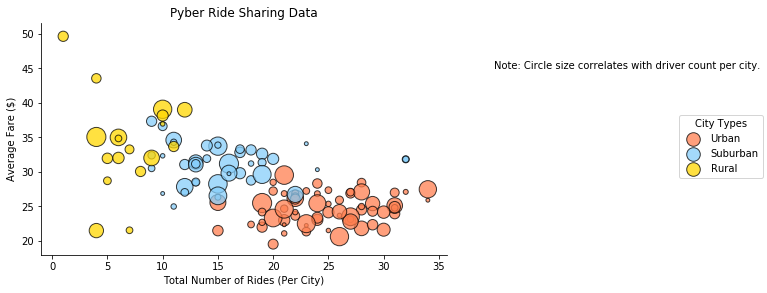

In [251]:
# create bubble plot

# set types of bubbles
_type = ['Urban', 'Suburban', 'Rural']

# assign color to city type
pal = dict(Urban="coral", Suburban="lightskyblue", Rural="gold")

df = combined_data

# create bubble plot
fg = sns.FacetGrid(data=df, hue='City Types', hue_order=_type, aspect=1.61, palette=pal, size=4)
fg.map(plt.scatter, 'Total Number of Rides', 'Average Fare', s=combined_data["Driver Count"]*5, 
       edgecolors="black", alpha=0.75).add_legend()

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.text(40,45,"Note: Circle size correlates with driver count per city.")


plt.show()

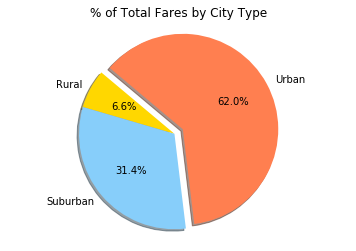

In [272]:
# % of Total Fares by City Type

# groupby city type and count number of fares for each
pct_fares = combined_data.groupby("City Types")
fares_count = pct_fares["Total Amount of Fares"].sum()
fares_count

# labels for sections of pie chart
labels = ["Rural", "Suburban", "Urban"]

# values of each section of the pie chart
sizes = fares_count

# colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)

plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.show()


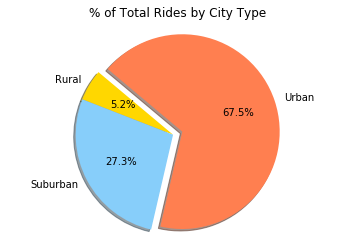

In [271]:
#% of Total Rides by City Type

pct_rides = combined_data.groupby("City Types")
tot_ride_count = pct_rides["Total Number of Rides"].sum()
tot_ride_count

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = tot_ride_count

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.show()


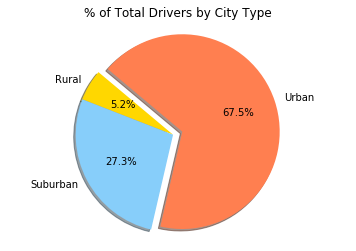

In [270]:
#% of Total Drivers by City Type
pct_driver = combined_data.groupby("City Types")
tot_driver_count = pct_driver["Driver Count"].sum()
tot_driver_count

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = tot_ride_count

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.show()